In [13]:
import sys
sys.path.append('/Users/danvasilyonok/Documents/Projects/Alchemist/src/etl')

In [14]:
import pandas as pd
from technical_indicators import *
from data import *
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv('../../data/SQ_hourly.csv')
data.head()

,time,open,high,low,close,volume
0,2021-08-06 20:00:00,275.0999,275.10,274.86,275.100,3456
1,2021-08-06 19:00:00,275.0500,275.05,274.86,275.000,3649
2,2021-08-06 18:00:00,275.0000,275.15,274.92,275.000,21987
3,2021-08-06 17:00:00,275.1000,275.10,274.76,275.050,85583
4,2021-08-06 16:00:00,275.4300,277.07,274.71,275.065,1456906


In [16]:
data = prep_data(data)

In [5]:
data

,time,open,high,low,close,volume
0,2019-08-19 05:00:00,63.6100,63.61,63.6100,63.6100,500
1,2019-08-19 06:00:00,63.6200,63.62,63.6200,63.6200,100
2,2019-08-19 08:00:00,63.6600,64.30,63.6600,64.2500,6124
3,2019-08-19 09:00:00,64.2500,64.26,63.6901,64.2400,22654
4,2019-08-19 10:00:00,64.1200,64.24,63.2000,63.5298,997682
...,...,...,...,...,...,...
7476,2021-08-06 16:00:00,275.4300,277.07,274.7100,275.0650,1456906
7477,2021-08-06 17:00:00,275.1000,275.10,274.7600,275.0500,85583
7478,2021-08-06 18:00:00,275.0000,275.15,274.9200,275.0000,21987
7479,2021-08-06 19:00:00,275.0500,275.05,274.8600,275.0000,3649


In [17]:
data.dtypes

time      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object

In [18]:
data['sma_7day'] = calc_sma(data, window=24*7)

In [19]:
data['sma_14day'] = calc_sma(data, window=24*14)

In [20]:
data['bb_width_14day'] = calc_bb_width(data, window=24*14)

In [21]:
data

,time,open,high,low,close,volume,sma_7day,sma_14day,bb_width_14day
0,2019-08-19 05:00:00,63.6100,63.61,63.6100,63.6100,500,NaN,NaN,NaN
1,2019-08-19 06:00:00,63.6200,63.62,63.6200,63.6200,100,NaN,NaN,NaN
2,2019-08-19 08:00:00,63.6600,64.30,63.6600,64.2500,6124,NaN,NaN,NaN
3,2019-08-19 09:00:00,64.2500,64.26,63.6901,64.2400,22654,NaN,NaN,NaN
4,2019-08-19 10:00:00,64.1200,64.24,63.2000,63.5298,997682,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7476,2021-08-06 16:00:00,275.4300,277.07,274.7100,275.0650,1456906,262.705020,252.642712,27.954931
7477,2021-08-06 17:00:00,275.1000,275.10,274.7600,275.0500,85583,262.780317,252.762295,27.993647
7478,2021-08-06 18:00:00,275.0000,275.15,274.9200,275.0000,21987,262.854127,252.883396,28.025427
7479,2021-08-06 19:00:00,275.0500,275.05,274.8600,275.0000,3649,262.909246,253.011283,28.035818


In [22]:
data['ror_14day'] = calc_ror(data, periods=24*14)

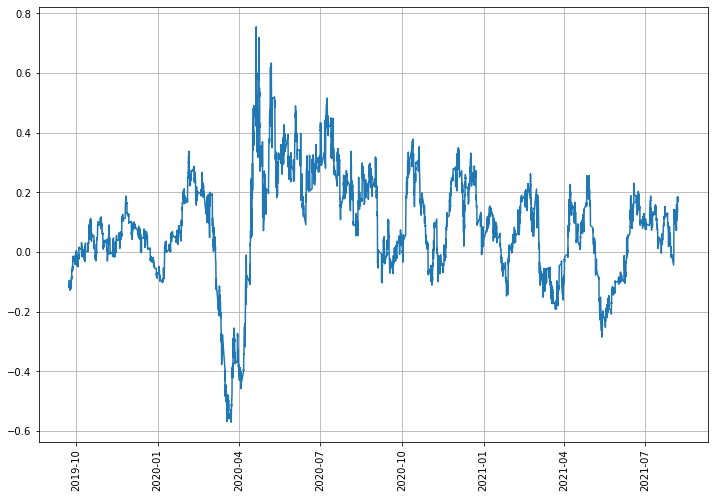

In [23]:
fig = plt.figure(figsize=(12,8))
plt.plot(data['time'], data['ror_14day'])

plt.xticks(rotation=90)
plt.grid()

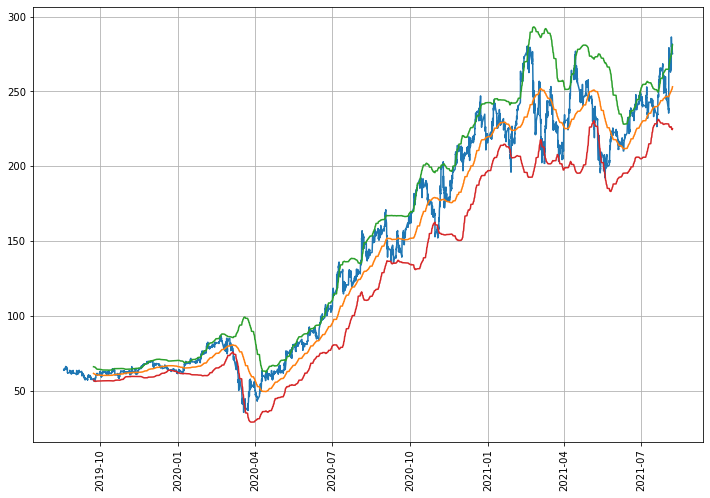

In [24]:
fig = plt.figure(figsize=(12,8))
plt.plot(data['time'], data['close'])

plt.plot(data['time'], data['sma_14day'])

plt.plot(data['time'], data['sma_14day'] + data['bb_width_14day'])
plt.plot(data['time'], data['sma_14day'] - data['bb_width_14day'])

plt.xticks(rotation=90)
plt.grid()